In [54]:
import pickle
import shap
import pandas as pd

In [55]:
#getting the model 
pickled_model = pickle.load(open('catBoost_final.pkl', 'rb'))

In [56]:
def make_prediction(classifier, input_data):
    blue_prediction = round(classifier.predict_proba(input_data)[0][0],4)
    red_prediction = round(classifier.predict_proba(input_data)[0][1],4)
    response = f"This model predicts, {input_data['B_fighter'][0]} has a {round(blue_prediction * 100, 2)}% chance of winning and {input_data['R_fighter'][0]} has a {round(red_prediction * 100, 2)}% chance of winning"
    return response 

In [57]:
#variables to be chosen by the user and then run
Blue_Reach = 0 
Red_Reach = 0 
Blue_age = 0 
Red_age = 0 
Blue_fighter_name = "Tai Tuivasa"
Red_fighter_name = "Ciryl Gane"
Red_losses = 0
Blue_losses = 0


In [58]:
def create_dict(b_r, r_r, b_age, r_age, b_name, r_name, r_l, b_l):
    fighter_data = {'B_Reach_cms': b_r,
                'R_Reach_cms': r_r,
                 'B_age': b_age,
                 'R_age': r_age,
                 'B_fighter': b_name,
                 'R_fighter': r_name,
                 'R_losses': r_l,
                 'B_losses': b_l}
    return fighter_data

In [59]:
fight_dict = create_dict(Blue_Reach, Red_Reach, Blue_age, Red_age, Blue_fighter_name, Red_fighter_name, Red_losses, Blue_losses)

In [60]:
X = pd.DataFrame.from_dict(fight_dict, orient = 'index').T

In [61]:
prediction = make_prediction(pickled_model, X)

In [62]:
print(prediction)

This model predicts, Tai Tuivasa has a 2.99% chance of winning and Ciryl Gane has a 97.01% chance of winning


In [63]:
explainer = shap.TreeExplainer(pickled_model)
shap_values = explainer.shap_values(X)


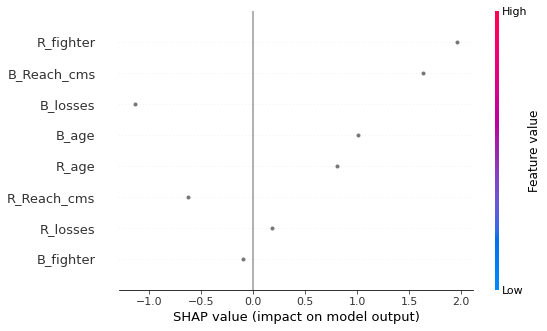

In [64]:
shap.summary_plot(shap_values, X)